In [1]:
import numpy as np
import scipy
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from tqdm import tqdm

import importlib

In [2]:
import ensembles

importlib.reload(ensembles)

<module 'ensembles' from 'C:\\Users\\Vladimir\\PycharmProjects\\House_sales\\experiments\\ensembles\\__init__.py'>

In [3]:
data = pd.read_csv('kc_house_data.csv')

data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
y = data.price.to_numpy()
X = data.drop(columns=['price'])
X['date'] = pd.to_datetime(X.date.apply(lambda s: f"{s[0:4]}-{s[4:6]}-{s[6:8]}")).apply(lambda dt: dt.value)
X.drop(columns='id', inplace=True)

X.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1413158400000000000,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1418083200000000000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,1424822400000000000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,1418083200000000000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1424217600000000000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


_sqft\_living_ --- жилая площадь (в квадратных футах)
_sqft\_lot_ --- площадь участка (в квадратных футах)
_waterfront_ --- дом у набережной или дом у озера, реки
_sqft\_living15_ --- средняя жилая площадь у ближайших 15 домов
_sqft\_lot15_ --- средняя площадь участка и ближайших 15 домов

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

print(f"{X_train.shape=}")
print(f"{X_test.shape=}")

X_train.shape=(17290, 19)
X_test.shape=(4323, 19)


In [6]:
X_train

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6325,1401148800000000000,3,1.75,1780,13095,1.0,0,0,4,9,1780,0,1983,0,98042,47.3670,-122.152,2750,13095
13473,1425945600000000000,2,1.00,1000,3700,1.0,0,0,3,6,800,200,1929,0,98118,47.5520,-122.290,1270,5000
17614,1424908800000000000,3,1.00,1080,7486,1.5,0,0,3,6,990,90,1942,0,98146,47.4838,-122.335,1170,7800
16970,1420675200000000000,3,2.25,2090,7500,1.0,0,0,4,7,1280,810,1977,0,98031,47.3951,-122.172,1800,7350
20868,1429228800000000000,2,2.50,1741,1439,2.0,0,0,3,8,1446,295,2007,0,98034,47.7043,-122.209,2090,10454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,1415836800000000000,3,1.50,1000,6914,1.0,0,0,3,7,1000,0,1947,0,98125,47.7144,-122.319,1000,6947
21575,1415664000000000000,3,2.50,3087,5002,2.0,0,0,3,8,3087,0,2014,0,98023,47.2974,-122.349,2927,5183
5390,1412035200000000000,3,2.50,2120,4780,2.0,0,0,3,7,2120,0,2004,0,98053,47.6810,-122.032,1690,2650
860,1403222400000000000,1,0.75,380,15000,1.0,0,0,3,5,380,0,1963,0,98168,47.4810,-122.323,1170,15000


In [7]:
rf = ensembles.RandomForestMSE(
    n_estimators=1_000,
    feature_subsample_size=6,
    random_state=42,
    max_depth=None
)

rf = Pipeline([
    ('scale', StandardScaler()),
    ('forest', rf)
])

rf.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('forest',
                 <ensembles.RandomForestMSE object at 0x00000171705FBC50>)])

In [8]:
y_pred = rf.predict(X_test)
print(f"MSE: {mean_squared_error(y_true=y_test, y_pred=y_pred) / np.mean(y_train):.0f}")
print(f"r^2: {r2_score(y_true=y_test, y_pred=y_pred):.4f}")

MSE: 44729
r^2: 0.8409


100%|██████████| 999/999 [08:01<00:00,  2.07it/s]


Text(0.5, 1.0, 'R^2 score')

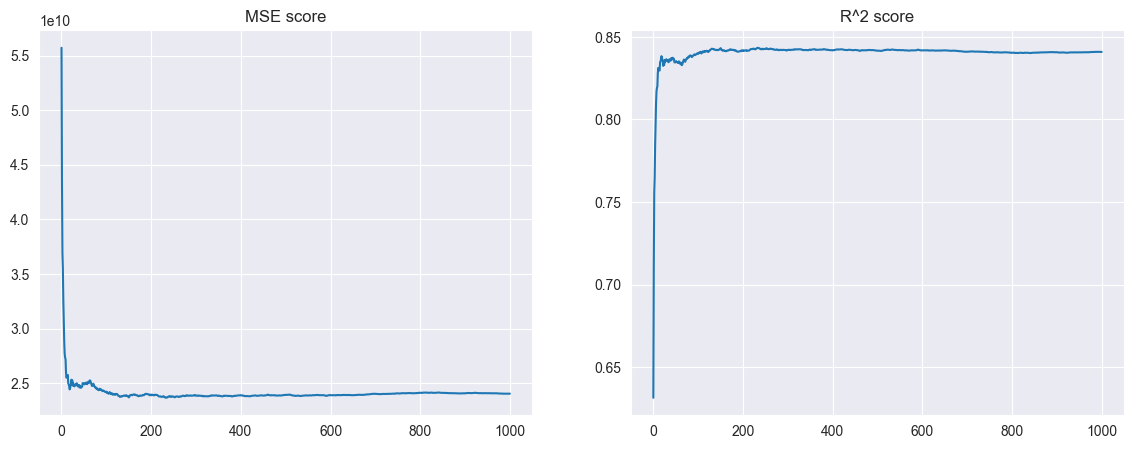

In [9]:
_, ax = plt.subplots(ncols=2, figsize=(14, 5))

estimators_cnt = np.arange(1_000 - 1) + 1
mse_score_ls = np.zeros_like(estimators_cnt, dtype=np.float64)
r2_score_ls = np.zeros_like(estimators_cnt, dtype=np.float64)

for i in tqdm(estimators_cnt):
    y_pred = rf.predict(X_test, **{'estimators_c': i})
    mse_score_ls[i-1] = mean_squared_error(y_true=y_test, y_pred=y_pred)
    r2_score_ls[i-1] = r2_score(y_true=y_test, y_pred=y_pred)
    
ax[0].plot(estimators_cnt, mse_score_ls)
ax[0].set_title("MSE score")

ax[1].plot(estimators_cnt, r2_score_ls)
ax[1].set_title("R^2 score")

In [10]:
ridge = Pipeline([
    ('scale', StandardScaler()),
    ('forest', Ridge(alpha=0.01))
])

ridge.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()), ('forest', Ridge(alpha=0.01))])

In [11]:
y_pred = ridge.predict(X_test)
print(f"MSE: {mean_squared_error(y_true=y_test, y_pred=y_pred) / np.mean(y_train):.0f}")
print(f"r^2: {r2_score(y_true=y_test, y_pred=y_pred):.4f}")

MSE: 83670
r^2: 0.7024


In [12]:
feat_cnt = np.arange(X_train.shape[1] - 1) + 1
mse_score_ls = np.zeros_like(feat_cnt, dtype=np.float64)
r2_score_ls = np.zeros_like(feat_cnt, dtype=np.float64)

for i in tqdm(feat_cnt):
    mse_score_raw = []
    r2_score_raw = []
    
    for seed in [42, 11, 5647, 456, 9195, 2023]:
        rf = ensembles.RandomForestMSE(
            n_estimators=100,
            feature_subsample_size=i,
            random_state=42,
            max_depth=None
        )
        
        rf = Pipeline([
            ('scale', StandardScaler()),
            ('forest', rf)
        ])
        
        rf.fit(X_train, y_train)
        mse_score_raw.append(mean_squared_error(y_true=y_test, y_pred=y_pred))
        r2_score_raw.append(r2_score(y_true=y_test, y_pred=y_pred))
    
    y_pred = rf.predict(X_test)
    mse_score_ls[i-1] = np.mean(mse_score_raw)
    r2_score_ls[i-1] = np.mean(r2_score_raw)

100%|██████████| 18/18 [07:42<00:00, 25.68s/it]


Text(0.5, 1.0, 'R2 score')

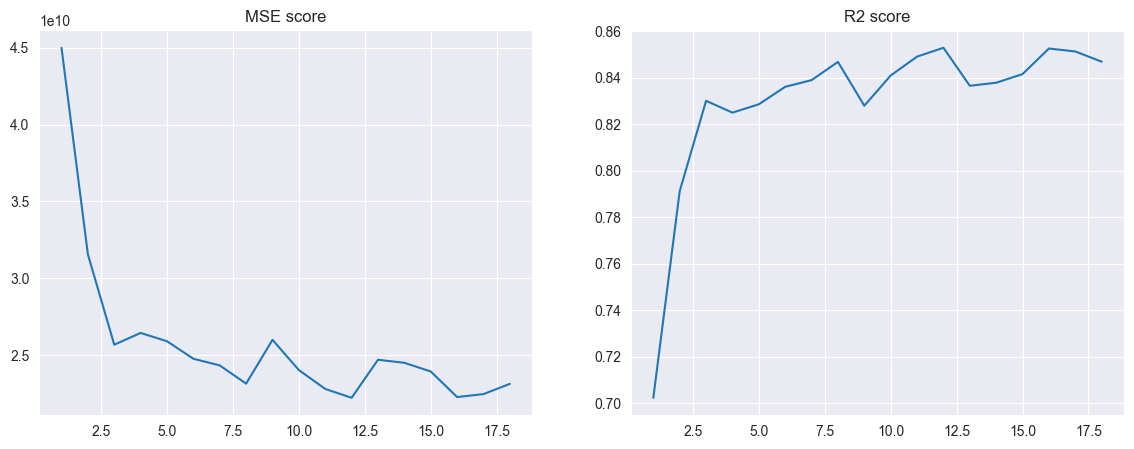

In [13]:
_, ax = plt.subplots(ncols=2, figsize=(14, 5))

ax[0].plot(feat_cnt, mse_score_ls)
ax[0].set_title('MSE score')

ax[1].plot(feat_cnt, r2_score_ls)
ax[1].set_title('R2 score')

In [14]:
depp = np.arange(15 - 1) + 1
mse_score_ls = np.zeros_like(depp, dtype=np.float64)
r2_score_ls = np.zeros_like(depp, dtype=np.float64)

for i in tqdm(depp):
    mse_score_raw = []
    r2_score_raw = []
    
    for seed in [42, 11, 5647, 456, 9195, 2023]:
        rf = ensembles.RandomForestMSE(
            n_estimators=250,
            feature_subsample_size=12,
            random_state=42,
            max_depth=i
        )
        
        rf = Pipeline([
            ('scale', StandardScaler()),
            ('forest', rf)
        ])
        
        rf.fit(X_train, y_train)
        mse_score_raw.append(mean_squared_error(y_true=y_test, y_pred=y_pred))
        r2_score_raw.append(r2_score(y_true=y_test, y_pred=y_pred))
    
    y_pred = rf.predict(X_test)
    mse_score_ls[i-1] = np.mean(mse_score_raw)
    r2_score_ls[i-1] = np.mean(r2_score_raw)

100%|██████████| 14/14 [03:20<00:00, 14.31s/it]


Text(0.5, 1.0, 'R2 score')

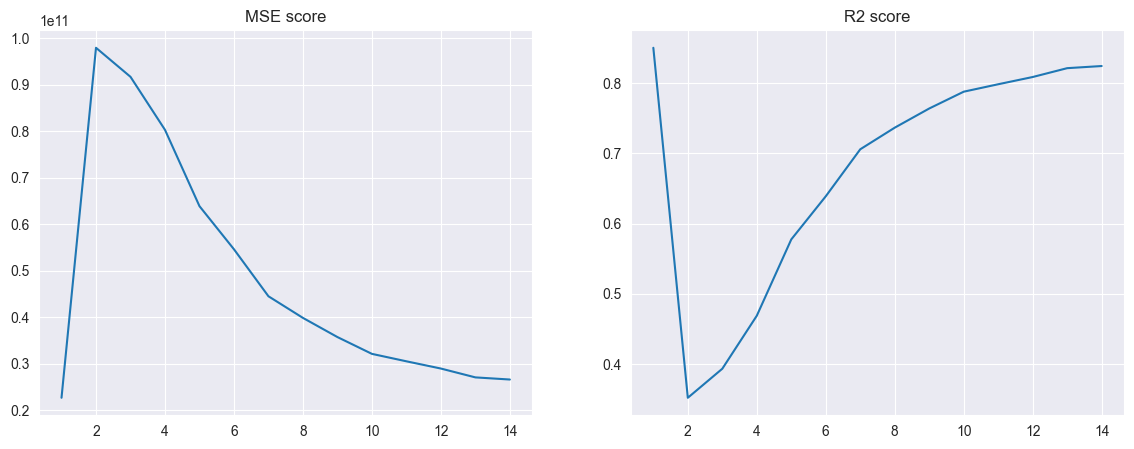

In [15]:
_, ax = plt.subplots(ncols=2, figsize=(14, 5))

ax[0].plot(depp, mse_score_ls)
ax[0].set_title('MSE score')

ax[1].plot(depp, r2_score_ls)
ax[1].set_title('R2 score')